# Lab: Build Neural Networks via Pytorch

The purpose of this assignment is to learn how to build neural networks using PyTorch, focusing on both the theoretical and practical aspects of the process.

One key step involves passing the output of a regression model through the Sigmoid function. This operation transforms the raw output (often called the logit) into a probability value between 0 and 1, which represents the likelihood of an observation belonging to the positive class. 

This step is particularly important in binary classification tasks, as it allows us to interpret the model's predictions in probabilistic terms and enables subsequent evaluation using metrics such as accuracy or binary cross-entropy loss.

## Imports
<hr>

In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchsummary import summary
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Neural Network Classification
<hr>

### 1. Binary Classification

We will build a binary classification model using PyTorch. The output of the regression model will be passed through the Sigmoid function to convert it into a value between 0 and 1, representing the probability that an observation belongs to the positive class.

#### PyTorch Tensor

Please convert your input data, X (features) and y (labels), into PyTorch tensors so they can be used with PyTorch models.

X_t and y_t are created as tensors with the data type torch.float32, which is required for most machine learning tasks in PyTorch.

In [369]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=2020)

# Your code for tensor
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)

print(X_t.shape, "\n", y_t.shape)

torch.Size([300, 2]) 
 torch.Size([300])


#### TensorDataset
Use PyTorch's TensorDataset and DataLoader to prepare the dataset for training, including batching and shuffling.

Requirements:

Combine X_t and y_t into a dataset using TensorDataset.

Use DataLoader to create batches of data for training. The batch size should be specified by the variable 45.
Enable shuffle=True in the DataLoader to randomize the order of data for each epoch.

In [372]:
# Create dataloader
# Your code for TensorDataset and dataloader
batchSize = 45

dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=batchSize, shuffle=True)

print('Length of y_t:', len(y_t), '\nTotal number of batches:', len(dataloader))


Length of y_t: 300 
Total number of batches: 7


#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Data points with y = 0 should be marked in blue, and those with y = 1 should be marked in red.
- Both the x-axis and y-axis labels should have a font size of 14.

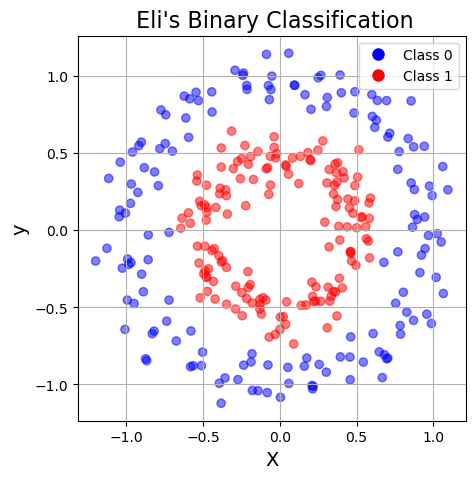

In [375]:
# Plot each class
# Your code plot with scatter

colors = np.where(y == 1, 'red', 'blue')

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1] , c=colors, alpha=0.5, label='Data Points')
plt.grid()

plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='blue', label='Class 0'),
                    plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='red', label='Class 1')])
# Add Label and title
plt.title(" Eli\'s Binary Classification", fontsize=16)

# Your code set graph axises
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)

plt.show()

In [377]:
# Plot each class
# Example results

We're going to start using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

#### Create Neural Network 

Implement a neural network class for binary classification using PyTorch's nn.Module.

- Create a fully connected layer that maps the input features to the hidden layer.
- Use Relu as activation
- Create another fully connected layer
- Use Sigmoid


In [381]:
class binaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            # Your code 
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Build trainer

Implement a simple training wrapper for a PyTorch network that handles the forward pass, backpropagation, and parameter updates for multiple epochs.

Training Process:

Epoch Loop: 
- Iterate over the specified number of epochs.

Batch Loop:
- Iterate over batches of X and y from the dataloader.
- Clear the gradients using optimizer.zero_grad().
- Perform a forward pass:
- Use the model to compute predictions (y_hat).
- Flatten the output to match the expected shape if necessary.
- Calculate the loss using criterion(y_hat, y).
- Perform backpropagation with loss to compute gradients.
- Update model parameters using optimizer.step().
- Accumulate the loss for the batch into a running total.

Logging:
- At the end of each epoch, compute and print the average loss over all batches if verbose is True.

In [384]:
def trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    # You may review the ipynb file from Week 6
    loss_per_epoch = []

    # Your code
    for epoch in range(epochs):
        losses = 0
        for X, y in dataloader:
            optimizer.zero_grad() # Clear gradients w.r.t. parameters
            y_hat = model(X).flatten() # Forward pass to get output
            loss = criterion(y_hat, y) # Calculate loss
            loss.backward() # Getting gradients w.r.t. parameters
            optimizer.step() # Update parameters
            losses += loss.item() # Add loss for this batch to running total
        if verbose: 
            print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")

        loss_per_epoch.append(losses / len(dataloader))

    return loss_per_epoch

In [386]:
model = binaryClassifier(input_size=2, hidden_size=6, output_size=1)

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [389]:
LEARNING_RATE = 0.1
criterion = nn.BCELoss() #loss function
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE) # optimization algorithm - Adam

Let's train the model:

In [392]:
# Your code
# set your mode with 2 input layers, 6 hidden layers, and 1 output layers via binaryClassifier class
# this was done before the optimizer as the optimizer references the model

#### Activation functions

We're going to using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [395]:
# build your trainer funtion with model, criterion, optimizer, dataloader, epochs=30, verbose=True
# Your code

losses = trainer(model, criterion, optimizer, dataloader, epochs=10, verbose=True)

epoch: 1, loss: 0.6621
epoch: 2, loss: 0.5995
epoch: 3, loss: 0.5523
epoch: 4, loss: 0.5250
epoch: 5, loss: 0.4814
epoch: 6, loss: 0.4301
epoch: 7, loss: 0.3756
epoch: 8, loss: 0.3123
epoch: 9, loss: 0.2544
epoch: 10, loss: 0.2190


#### Visualize your results 

#### Part 1: Loss Curve

- Please plot the loss curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

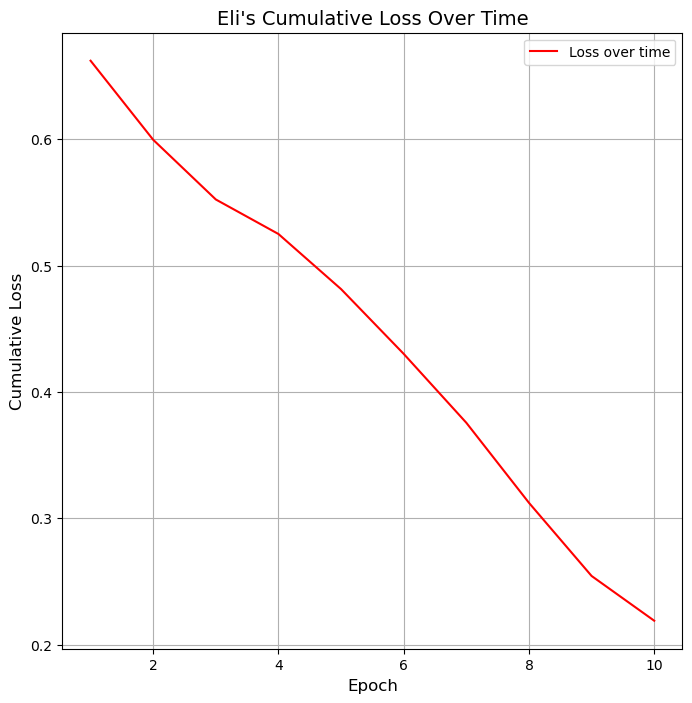

In [399]:
# Your code 
plt.figure(figsize=(8, 8))
plt.plot(range(1, 1 + len(losses)), losses, color='red', label='Loss over time')
plt.title('Eli\'s Cumulative Loss Over Time', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Cumulative Loss', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

### Part 2: Actual and predicted data 

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

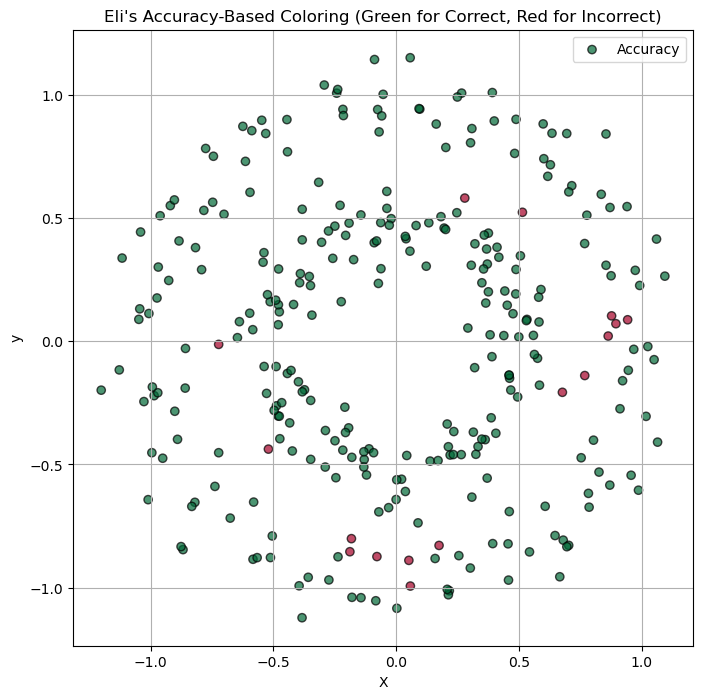

In [402]:
# Your code
model.eval()  # Set model to evaluation mode

# Get predictions on the test set
with torch.no_grad():
    y_pred_prob = model(X_t)  # Get predicted probabilities
    y_pred = y_pred_prob.round()  # Convert probabilities to binary labels (0 or 1)

# Determine the accuracy of each prediction
# Ensure the comparison works correctly by squeezing to remove single-dimensional entries
correct = y_pred.squeeze() == y_t.squeeze()

plt.figure(figsize=(8, 8))

# Visualize data points with color based on accuracy (green for correct, red for incorrect)
plt.scatter(X_t[:, 0], X_t[:, 1], c=correct.numpy(), cmap="RdYlGn", edgecolors="k", alpha=0.7, label="Accuracy")

# Add labels and legend
plt.title('Eli\'s Accuracy-Based Coloring (Green for Correct, Red for Incorrect)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

To be clear, our model is just outputting some number between -1 and +1 (we are applying Sigmoid in the model), so:
- To get the probabilities we would need to pass them through a Sigmoid;
- To get classes, we can apply some threshold (usually 0.5) to this probability.

For example, we would expect the point (0,0) to have a high probability and the point (-1,-1) to have a low probability:

In [405]:
prediction = y_pred_prob
print(prediction)

tensor([[0.7462],
        [0.9766],
        [0.9018],
        [0.9879],
        [0.0150],
        [0.7487],
        [0.3345],
        [0.8659],
        [0.9216],
        [0.9763],
        [0.0052],
        [0.8317],
        [0.9167],
        [0.0174],
        [0.0947],
        [0.2190],
        [0.0311],
        [0.9713],
        [0.3313],
        [0.3427],
        [0.2356],
        [0.7761],
        [0.0132],
        [0.9621],
        [0.8937],
        [0.8220],
        [0.8634],
        [0.9794],
        [0.9699],
        [0.0084],
        [0.9337],
        [0.0405],
        [0.9278],
        [0.0069],
        [0.8789],
        [0.9305],
        [0.2921],
        [0.0119],
        [0.6366],
        [0.8752],
        [0.9623],
        [0.9458],
        [0.0378],
        [0.7609],
        [0.0297],
        [0.0627],
        [0.0025],
        [0.9596],
        [0.0370],
        [0.0392],
        [0.0349],
        [0.0384],
        [0.1164],
        [0.8203],
        [0.5314],
        [0

In [407]:
probability = y_pred
print(probability)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
      

In [409]:
classes = np.where(probability > 0.5, 1, 0)
print(classes)

[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]


### 2. Multiclass Classification

For multiclass classification, we'll need the softmax function:

$$\sigma(\vec{z})_i=\frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}$$

It basically outputs probabilities for each class we wish to predict, and they all sum to 1. 

`torch.nn.CrossEntropyLoss` is a loss that combines a softmax with cross entropy loss. 

Let's try a 4-class classification problem using the following network:


In [529]:
X, y = make_blobs(n_samples=200, centers=4, center_box=(-1.2, 1.2), cluster_std=[0.15, 0.15, 0.15, 0.15], random_state=12345)
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.long)

print(X_t.shape, "\n", y_t.shape, "\n", y)

# Create dataloader
batchSize = 25
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=batchSize, shuffle=True)

torch.Size([200, 2]) 
 torch.Size([200]) 
 [1 0 2 1 1 0 0 1 0 0 1 3 0 0 1 0 3 3 1 2 3 1 3 2 1 0 0 2 2 0 0 0 0 1 0 3 2
 2 3 2 2 3 2 3 3 3 0 0 2 3 2 0 3 2 3 2 1 3 1 2 2 3 2 0 3 2 0 2 3 1 1 2 2 1
 3 1 3 2 2 3 2 3 3 2 1 0 3 3 1 3 3 1 3 1 1 2 0 1 2 1 2 0 1 0 3 0 2 2 0 1 2
 3 3 2 3 2 3 0 0 3 0 1 2 2 3 1 3 3 2 3 1 1 0 2 3 1 0 0 1 0 0 3 3 2 3 1 1 2
 1 0 0 0 2 1 2 0 1 1 0 1 2 2 1 3 1 1 3 2 0 1 1 1 2 3 1 1 3 0 0 1 2 2 3 0 3
 2 3 2 1 0 0 1 0 0 3 2 0 1 0 0]


In [531]:
class multiClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output_size),
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Both the x-axis and y-axis labels should have a font size of 14.

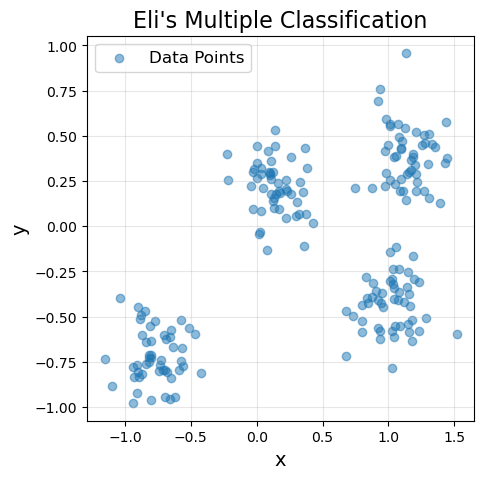

In [541]:
# Plot each class
# Your code plot with scatter

# Add Label and title
plt.figure(figsize=(5, 5))
plt.title("Eli\'s Multiple Classification", fontsize=16)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Data Points')

plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Let's train this model:

In [564]:
def trainer2(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    # You may review the ipynb file from Week 6
    loss_per_epoch = []
    accuracy_per_epoch = []
    
    # Your code
    for epoch in range(epochs):
        losses = 0
        correct_predictions = 0
        total_predictions = 0
        for X, y in dataloader:
            optimizer.zero_grad() # Clear gradients w.r.t. parameters
            y_hat = model(X) # Forward pass to get output
            loss = criterion(y_hat, y) # Calculate loss
            loss.backward() # Getting gradients w.r.t. parameters
            optimizer.step() # Update parameters
            losses += loss.item() # Add loss for this batch to running total

            _, predicted = torch.max(y_hat, 1)  # Get the index of the max logit (predicted class)
            correct_predictions += (predicted == y).sum().item()  # Compare with true labels
            total_predictions += y.size(0)  # Count total samples processed
        if verbose: 
            print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}, accuracy: {correct_predictions / total_predictions:.4f}")

        loss_per_epoch.append(losses / len(dataloader))
        accuracy_per_epoch.append(100 * (correct_predictions / total_predictions))
        
    return loss_per_epoch, accuracy_per_epoch

In [566]:
# model with 2 input layers, 6 hidden layers, and 4 output layers via multiClassifier class
# Your code 
model_2 = multiClassifier(input_size=2, hidden_size=6, output_size=4)

# Your code 
LEARNING_RATE = 0.2
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=LEARNING_RATE)

losses, accuracies = trainer2(model_2, criterion, optimizer, dataloader, epochs=10, verbose=True)

epoch: 1, loss: 0.8342, accuracy: 0.6450
epoch: 2, loss: 0.0792, accuracy: 1.0000
epoch: 3, loss: 0.0111, accuracy: 1.0000
epoch: 4, loss: 0.0017, accuracy: 1.0000
epoch: 5, loss: 0.0031, accuracy: 1.0000
epoch: 6, loss: 0.0005, accuracy: 1.0000
epoch: 7, loss: 0.0008, accuracy: 1.0000
epoch: 8, loss: 0.0008, accuracy: 1.0000
epoch: 9, loss: 0.0005, accuracy: 1.0000
epoch: 10, loss: 0.0003, accuracy: 1.0000


#### Visualize your results 

### Part 3: Accuracy Curve for 4 classes

- Please plot the Accuracy Curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

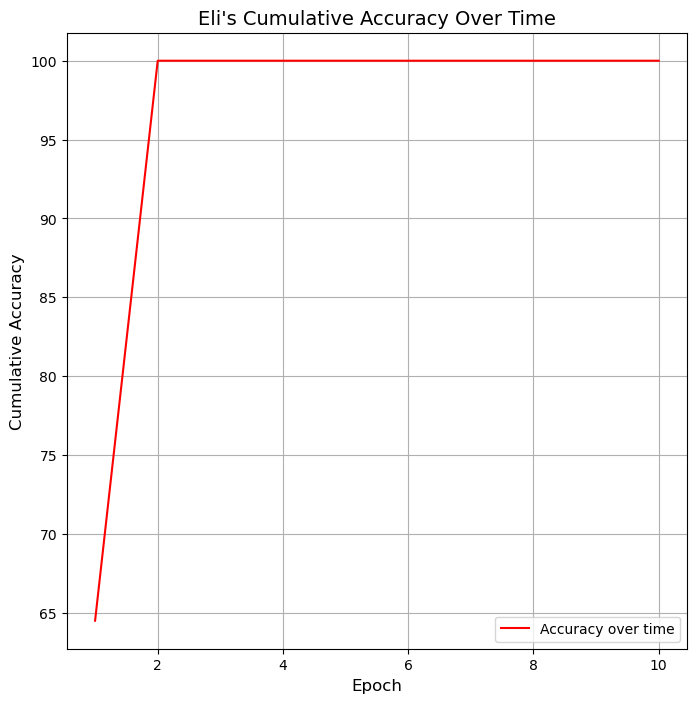

In [572]:
# Your code 
plt.figure(figsize=(8, 8))
plt.plot(range(1, 1 + len(accuracies)), accuracies, color='red', label='Accuracy over time')
plt.title('Eli\'s Cumulative Accuracy Over Time', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Cumulative Accuracy', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

### Part 4: Actual and predicted data for classes

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

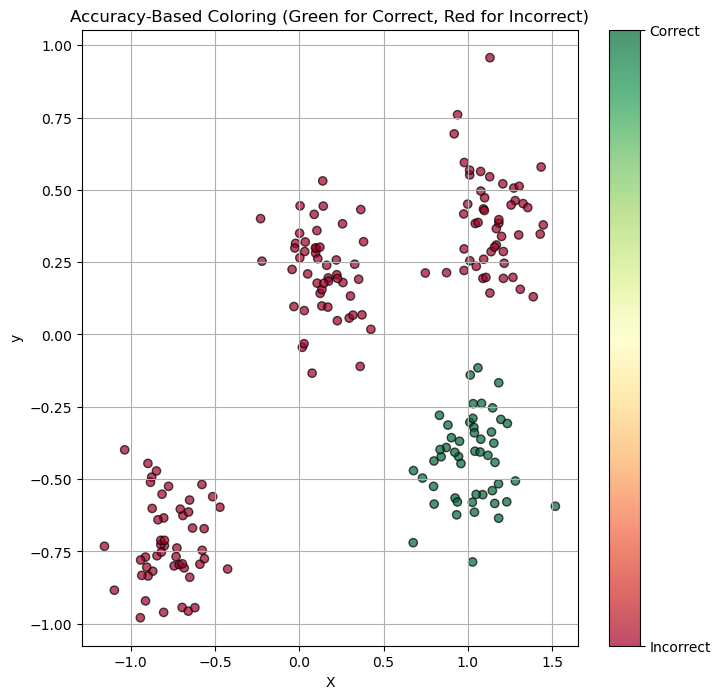

In [574]:
# Set model to evaluation mode
model.eval()

# Get predictions on the test set
with torch.no_grad():
    y_pred_logit = model(X_t)  # Get predicted logits
    y_pred = torch.argmax(y_pred_logit, dim=1)  # Get predicted class indices

# Determine the accuracy of each prediction
correct = y_pred == y_t.long()  # Compare predicted class indices with actual labels

# Plotting
plt.figure(figsize=(8, 8))

# Visualize data points with color based on accuracy (green for correct, red for incorrect)
# Here, correct is a boolean tensor (True for correct, False for incorrect)
# Convert to a numpy array and use it as the color parameter for the scatter plot
plt.scatter(X_t[:, 0], X_t[:, 1], c=correct.numpy(), cmap="RdYlGn", edgecolors="k", alpha=0.7)

# Add labels and legend
plt.title('Accuracy-Based Coloring (Green for Correct, Red for Incorrect)')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)

# Optional: Add a colorbar to indicate the correctness (0 = Incorrect, 1 = Correct)
cbar = plt.colorbar()
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Incorrect', 'Correct'])

plt.show()

# Thats not right...